In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#Load the Data
df = pd.read_csv('wmt_data.csv')

Exploratory Data Analysis

In [3]:
# Missing Data Check
print("Missing data:\n", df.isnull().sum())

Missing data:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


In [5]:
df.head(10)

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,22.791668,23.000000,21.833332,22.270832,14.307388,25109700
1,2000-01-04 00:00:00-05:00,21.833332,21.937500,21.395832,21.437500,13.772032,20235300
2,2000-01-05 00:00:00-05:00,21.291668,21.458332,20.729168,21.000000,13.490974,21056100
3,2000-01-06 00:00:00-05:00,21.000000,21.520832,20.895832,21.229168,13.638196,19633500
4,2000-01-07 00:00:00-05:00,21.500000,22.979168,21.500000,22.833332,14.668746,23930700
5,2000-01-10 00:00:00-05:00,22.416668,22.500000,21.875000,22.416668,14.401082,20142900
6,2000-01-11 00:00:00-05:00,22.354168,22.583332,21.875000,22.083332,14.186931,14829900
7,2000-01-12 00:00:00-05:00,22.062500,22.250000,21.687500,21.687500,13.932639,12255000
8,2000-01-13 00:00:00-05:00,22.000000,22.041668,21.666668,21.708332,13.946027,15063000
9,2000-01-14 00:00:00-05:00,21.333332,21.979168,21.333332,21.500000,13.812189,18936600


In [6]:
#Check Data Types
print("Data types:\n", df.dtypes)

Data types:
 date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object


In [7]:
#Convert Date Column to Datetime
df['date'] = pd.to_datetime(df['date'], utc=True).dt.date

In [7]:
#Describe the Data
print("Summary Statistics:\n", df.describe())

Summary Statistics:
               open         high          low        close    adj_close  \
count  6345.000000  6345.000000  6345.000000  6345.000000  6345.000000   
mean     27.795108    28.035953    27.562206    27.802202    23.525582   
std      15.407437    15.520020    15.298979    15.416064    16.874871   
min      14.000000    14.226667    13.812500    14.090000     9.293771   
25%      17.556667    17.736668    17.386667    17.559999    11.818660   
50%      21.145832    21.326668    20.906668    21.183332    16.898726   
75%      32.703335    32.950001    32.413334    32.703335    29.430143   
max     105.300003   105.300003   103.599998   105.050003   104.762314   

             volume  
count  6.345000e+03  
mean   3.094107e+07  
std    1.965558e+07  
min    6.094200e+06  
25%    1.864440e+07  
50%    2.517060e+07  
75%    3.682830e+07  
max    2.903604e+08  


In [8]:
#Calculate 50-day and 200-day Moving Averages
df['50_day_moving_avg'] = df['close'].rolling(window=50).mean()
df['200_day_moving_avg'] = df['close'].rolling(window=200).mean()

In [9]:
# Calculate Daily Returns
df['daily_return'] = df['adj_close'].pct_change()

Visualization of Data

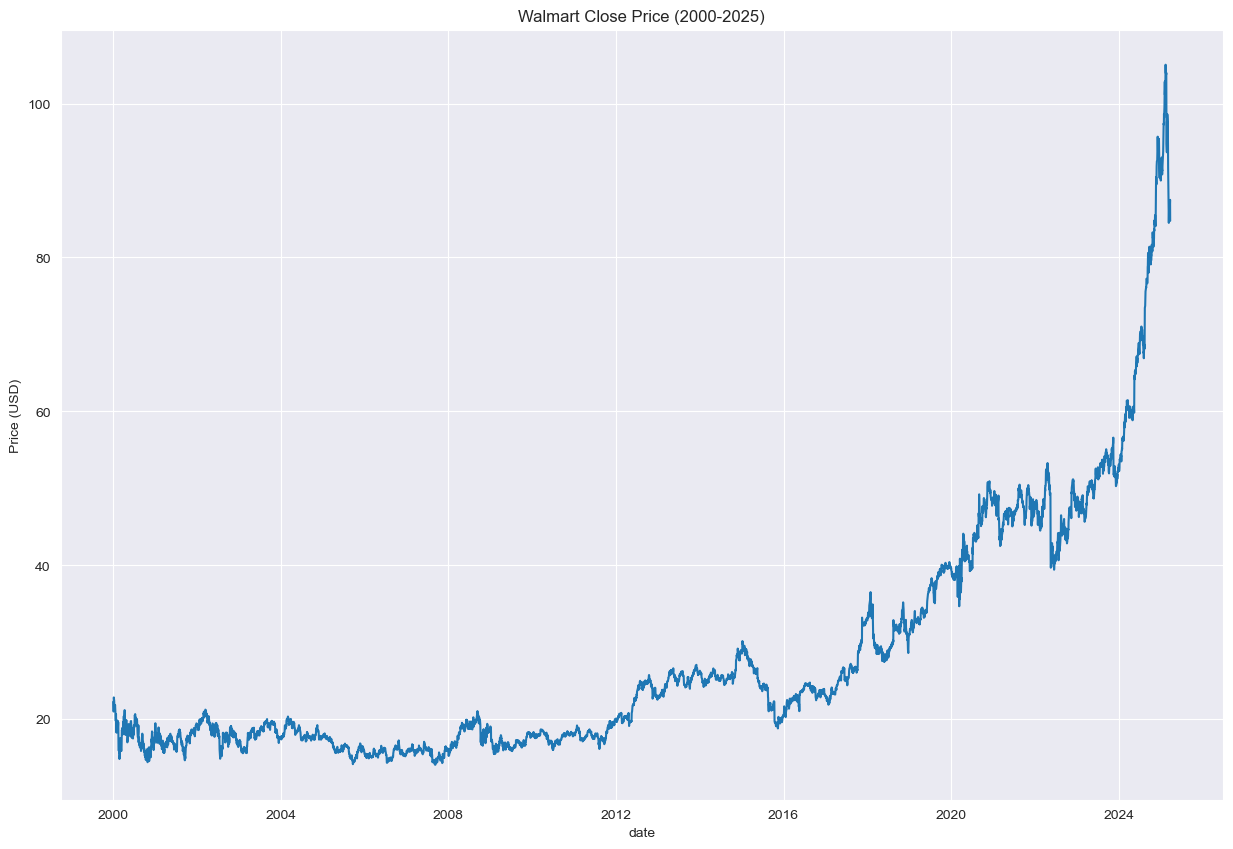

In [10]:
# Plot Close Price
plt.figure(figsize=(15,10))
sns.lineplot(
    data=df,
    x='date',
    y='close')
plt.title('Walmart Close Price (2000-2025)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

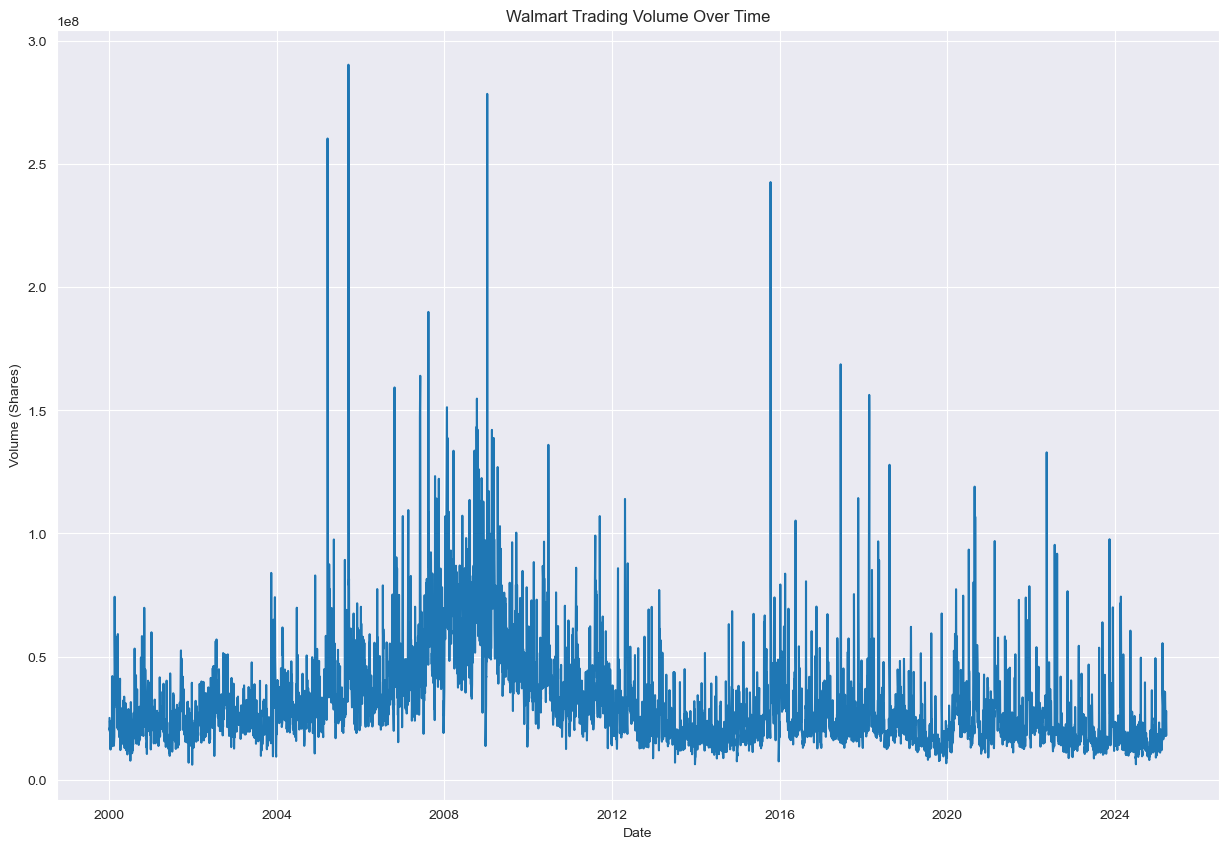

In [11]:
# Volume Over Time
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=df,
    x='date',
    y='volume')
plt.title('Walmart Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.grid(True)
plt.show()

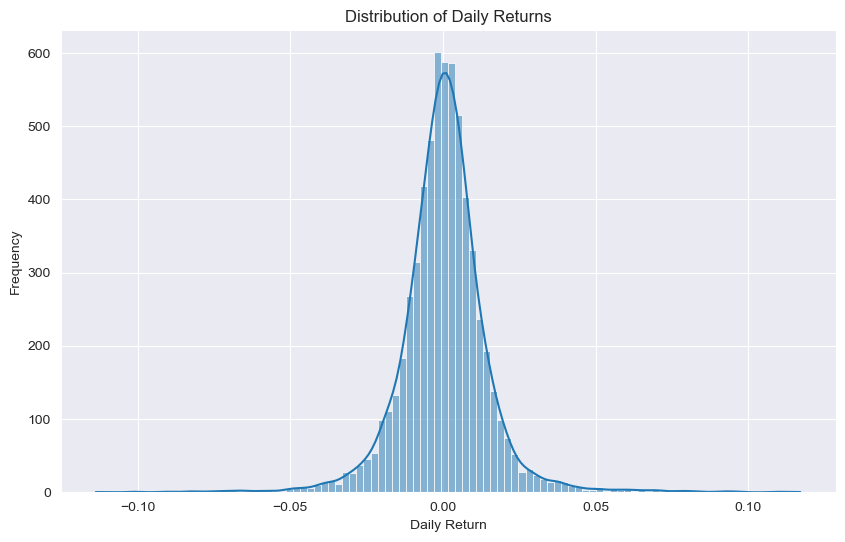

In [13]:
#Daily Returns Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

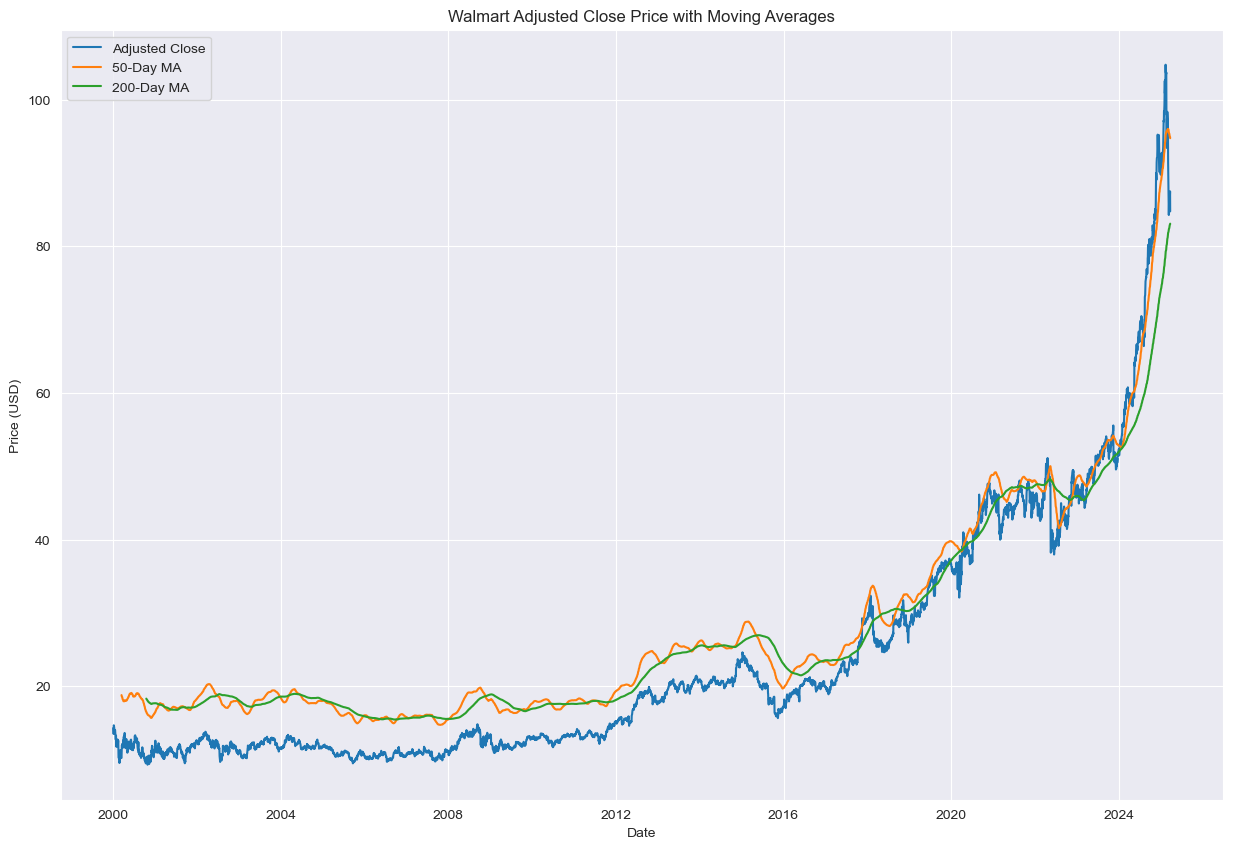

In [14]:
# Adjusted Close with Moving Averages
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=df,
    x='date',
    y='adj_close',
    label='Adjusted Close')
sns.lineplot(
    data=df,
    x='date',
    y='50_day_moving_avg',
    label='50-Day MA')
sns.lineplot(
    data=df,
    x='date',
    y='200_day_moving_avg',
    label='200-Day MA')
plt.title('Walmart Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

A/B Analysis

In [15]:
#Scenario: Compare stock performance (daily returns) before and after a significant event, e.g., pandemic (2020-02-29)

pre_covid = df[df.date < pd.to_datetime('2020-02-29').date()]['daily_return'].dropna()
post_covid = df[df.date > pd.to_datetime('2020-02-29').date()]['daily_return'].dropna()

t_stat, p_val = stats.ttest_ind(pre_covid, post_covid, equal_var=False)
print(f"T-test Results: t-statistic= {t_stat:.2f}, P-Value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("There is significant difference in daily returns between the pre-pandemic and post-pandemic periods.")
else:
    print("No significant difference in returns.")


T-test Results: t-statistic= -1.24, P-Value: 0.2154
No significant difference in returns.
